# Journey of a Small Data Science Project

* In **Part 1**, we have explored the data, cleaned up the data, modified features, and created new ones. 
* In **Part 2**, we will apply supervised machine learning models for classification and regression, evaluate its performance, and identify the best models to solve the following problems: 

    * The **classification problem** is: given a train dataset of patients who survived or did not survive, build a model which can determine based on a given test dataset not containing the death event information information, if these patients in the test dataset survived or not. 

    * The **regression problem** is: predict the number of months that remains for the survival of the patient.



## Part 1 - Data Analysis & Data Cleaning

Dataset (Breast Cancer) : https://www.kaggle.com/datasets/reihanenamdari/breast-cancer

In [1]:
import pandas as pd
df = pd.read_csv("Breast_Cancer-Winter2024.csv")

In [2]:
df.head(5)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4.0,Positive,Positive,24,1,60.0,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35.0,Positive,Positive,14,5,62.0,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63.0,Positive,Positive,14,7,75.0,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18.0,Positive,Positive,2,1,NaN,Alive
4,47,White,Married,T2,N1,IIB,NaN,3,Regional,41.0,Positive,Positive,3,1,NaN,Alive


#### 1. Notice the missing values in the dataset

In [3]:
missing_values_total = df.isnull().sum()
missing_values_total

Age                       0
Race                      0
Marital Status            0
T Stage                   5
N Stage                   0
6th Stage                 0
differentiate             6
Grade                     0
A Stage                   0
Tumor Size                6
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           7
Status                    0
dtype: int64

#### 2. Treating the missing values for the attributes we will include in the analysis:

In [4]:
# List of medical variable columns
medical_columns = ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']

# Replace missing values with the median for each medical variable column
for column in medical_columns:
    df[column] = df[column].fillna(df[column].median())

#Replace missing values for T Stage and differentiate using mode since they are categorical variables
categorical_columns = ['T Stage ','differentiate']

for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   T Stage                 4024 non-null   object 
 4   N Stage                 4024 non-null   object 
 5   6th Stage               4024 non-null   object 
 6   differentiate           4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   float64
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

#### 3. Analyze the distribution of death events cases among the patients and the race. Calculate their respective numbers and percentages.


In [5]:
#Analyze the distribution of death events cases among the patients and the race. 
#calculate their respective numbers and percentages

df_death = df[df['Status']=='Dead']
df_count = df_death['Race'].value_counts()
death_percentage = (df_count/df_count.sum())*100
print("Analysis of the distribution of death events cases among the patients and the race:")
print("Death count by race: ")
print(df_count)
print("Percentage of deaths by race:")
print(death_percentage)

Analysis of the distribution of death events cases among the patients and the race:
Death count by race: 
Race
White    510
Black     73
Other     33
Name: count, dtype: int64
Percentage of deaths by race:
Race
White    82.792208
Black    11.850649
Other     5.357143
Name: count, dtype: float64


#### 4. Compute descriptive statistics of the data. Comment on the results:

In [6]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.414016,14.357107,4.158052,71.176938
std,8.963134,21.139607,8.099675,5.109331,23.069683
min,30.000000,0.000000,1.000000,1.000000,0.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


The results of the descriptive statistics of the numerical data shown are:
- count which returns the number of non-null values in each column thereby allowing us to identify the columns with missing or null values.
- mean and median or 50% quartile values for age, tumor size, regional nodes examined, and survival months provide central tendency for the data that help us find the average and middle values of a dataset.
- min and max values of the dataset allow us to find the range of the dataset meaning max - min.
- The quartiles (25%,50%,75%) values provide a spread of the dataset to help identify any skewness or outliers and finding the interquartile range (q3 at 75% - q1 at 25% ).
- The standard deviation indicates the variability or dispersion around the mean for each variable.

#### 5. Analyze the skew and the kurtosis of medical variables distributions. Comment on the results: 

The skewness and the kurtosis of medical variables distributions:
Skewness: 
Age                      -0.220373
Tumor Size                1.738227
Regional Node Examined    0.829274
Reginol Node Positive     2.702536
Survival Months          -0.612032
dtype: float64 

Kurtosis: 
Age                      -0.755088
Tumor Size                3.634147
Regional Node Examined    1.649322
Reginol Node Positive     8.981266
Survival Months           0.076193
dtype: float64


Text(0.5, 1.0, 'Survival Months')

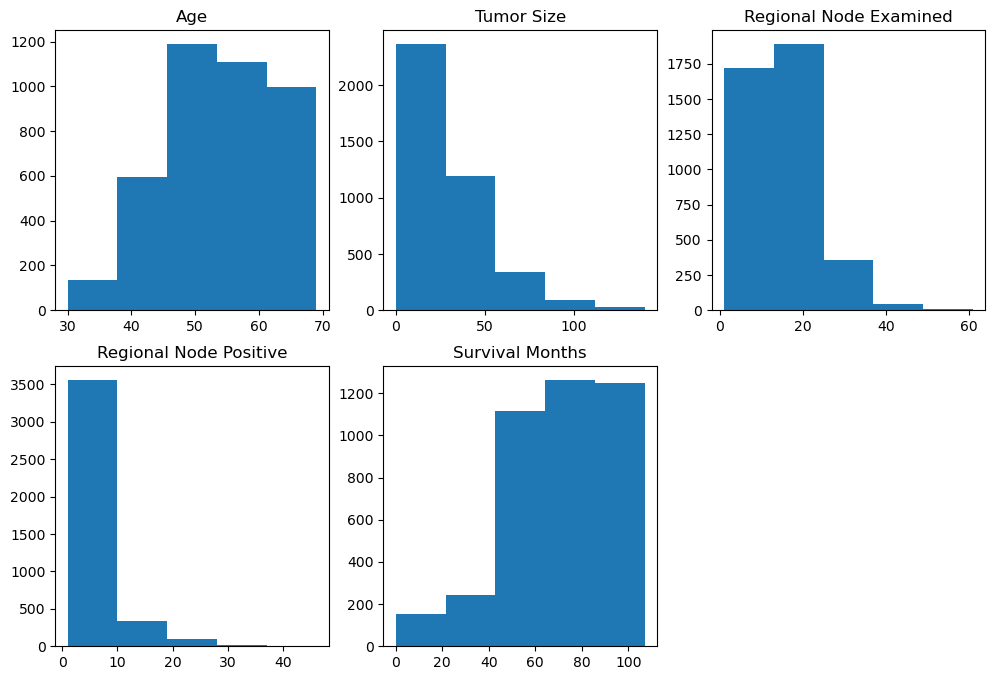

In [7]:
num_col = df.select_dtypes(include=['int64', 'float64'])
skewness = num_col.skew()
kurtosis = num_col.kurtosis()
print("The skewness and the kurtosis of medical variables distributions:")
print("Skewness: ")
print(skewness,"\n")
print("Kurtosis: ")
print(kurtosis)

#(Numbers & Graphs)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=[12,8])

plt.subplot(2,3,1)
plt.hist(df['Age'],bins=5)
plt.title("Age")

plt.subplot(2,3,2)
plt.hist(df['Tumor Size'],bins=5)
plt.title("Tumor Size")

plt.subplot(2,3,3)
plt.hist(df['Regional Node Examined'],bins=5)
plt.title("Regional Node Examined")

plt.subplot(2,3,4)
plt.hist(df['Reginol Node Positive'],bins=5)
plt.title("Regional Node Positive")

plt.subplot(2,3,5)
plt.hist(df['Survival Months'],bins=5)
plt.title("Survival Months")

The results show the kurtosis and skewness of the medical variable distributions as well as the histograms of the each of the medical variable distributions namely, Age, Tumor Size, Regional Node Examined, Regional Node Positive and Survival Months. 

For Age, the skewness is -0.22 a negative skewness and kurtosis is -0.75 which is negative as well so the histogram is skewed to the left and kurtosis which is negative since its less than -1, meaning the distribution is less peaked than normal distribution or peak is flatter than a normal curve.

For Tumor Size, the skewness is 1.73 a positive skewness therefore the histogrma is skewed to the right. The kurtosis which is 3.62 a positive kurtosis indicating the histogram is greater than 1 a sharper peak than the normal distribution curve.

Furthermore, the regional node examined skewness is 0.82 indicating a histogram skewed to the right and kurtosis is 1.64 which is almost equal to 1 indicating a historgram with a peakedness similar to a normal distribution however the .64 indicates the peak the histogram shows which is a bit sharper than the normal curve.

The regional node positive, skewness is 2.70 indicating a histogram skewed to the right since its positive skewness and kurtosis is 8.98 which is greater than 1 showing a significantly sharper peak than the normal distribution.

The survival months, skewness is -0.6 so skewed to the left and kurtosis is 0.07 which is less than 1 so the peak has a flatter distribution compared to the normal bell curve.

#### 6. Use univariate plots to analyze patterns in each of the medical variables with respect to the outcome (death status).

Death count by race:
Race
White    510
Black     73
Other     33
Name: count, dtype: int64

Death count by marital status:
Marital Status
Married      58.12
Single       16.88
Divorced     14.61
Widowed       7.95
Separated     2.44
Name: proportion, dtype: float64


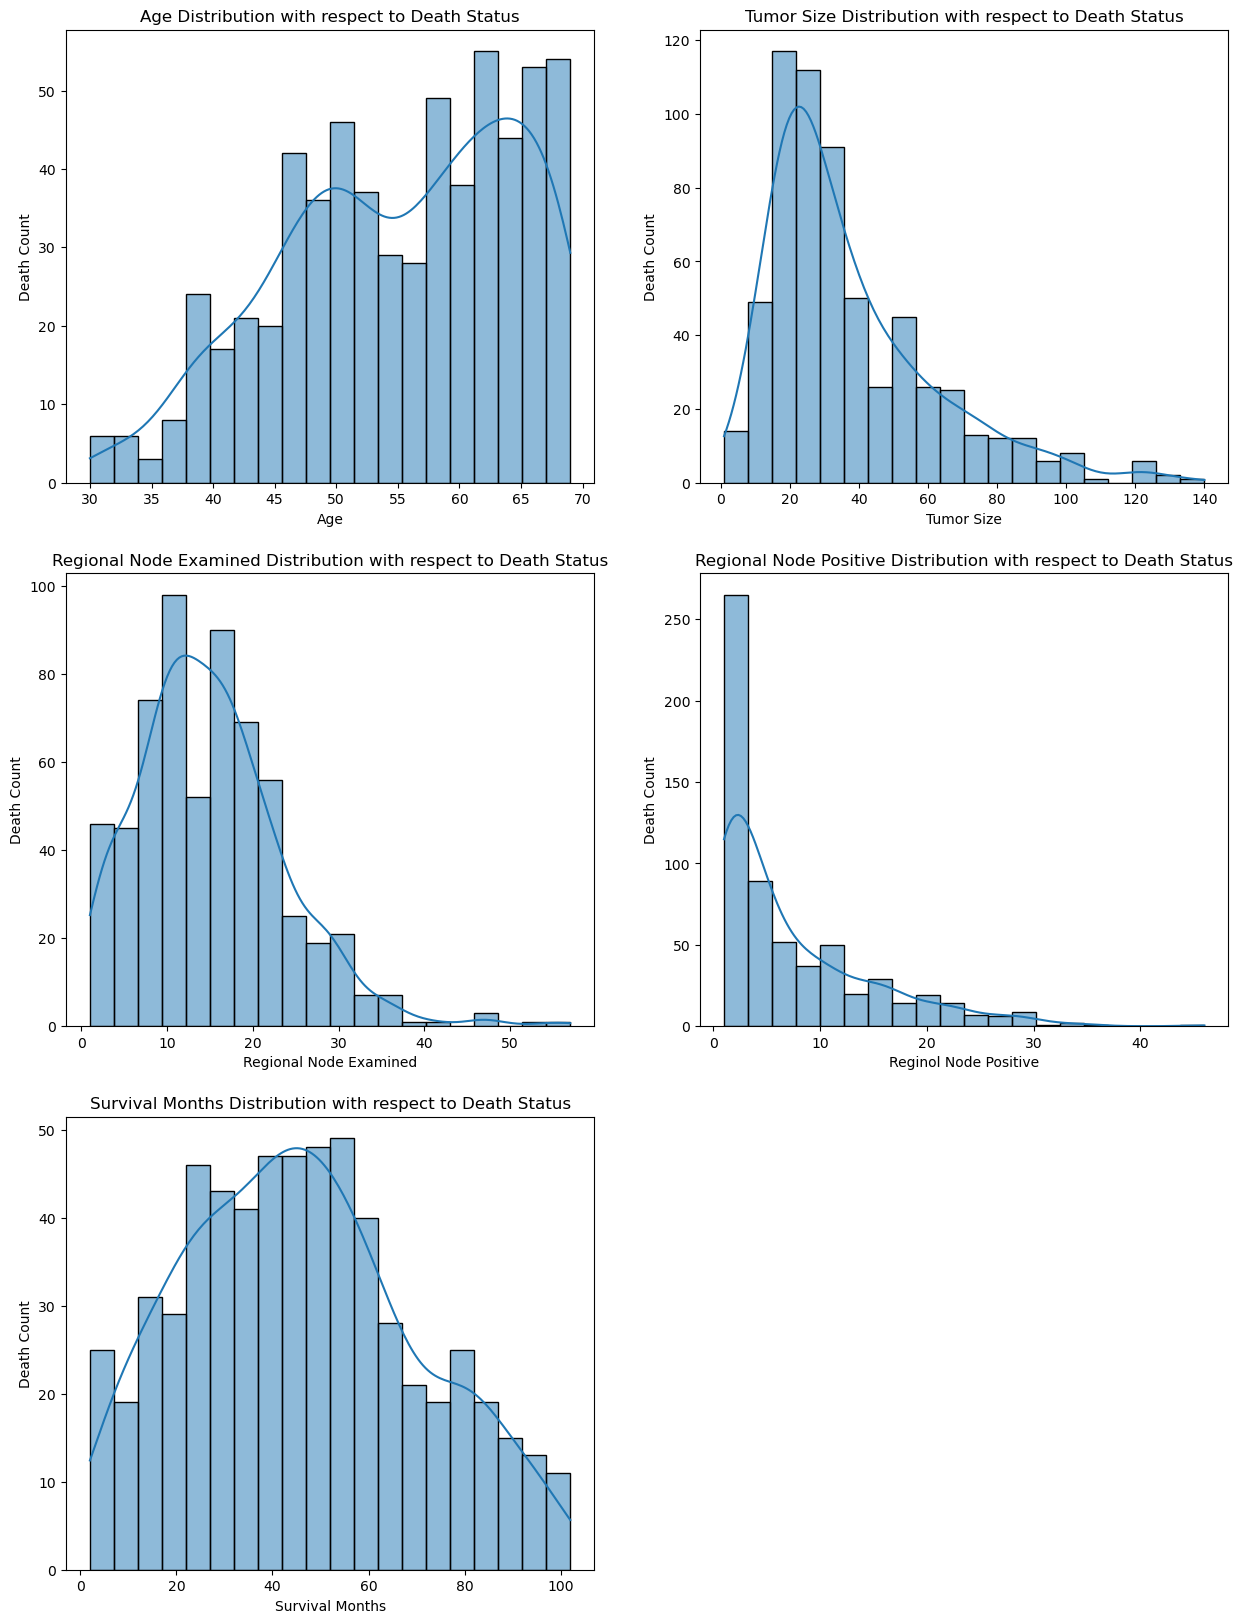

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for deceased patients
dead = ['Dead']
death = df[df['Status'].isin(dead)]

# Create subplots for each medical variable
plt.figure(figsize=(15, 20))

# Age 
plt.subplot(3, 2, 1)
sns.histplot(data=death, x='Age', bins=20, kde=True)
plt.title('Age Distribution with respect to Death Status')
plt.ylabel('Death Count')

# Tumor Size 
plt.subplot(3, 2, 2)
sns.histplot(data=death, x='Tumor Size', bins=20, kde=True)
plt.title('Tumor Size Distribution with respect to Death Status')
plt.ylabel('Death Count')

# Regional Node Examined 
plt.subplot(3, 2, 3)
sns.histplot(data=death, x='Regional Node Examined', bins=20, kde=True)
plt.title('Regional Node Examined Distribution with respect to Death Status')
plt.ylabel('Death Count')

# Regional Node Positive
plt.subplot(3, 2, 4)
sns.histplot(data=death, x='Reginol Node Positive', bins=20, kde=True)
plt.title('Regional Node Positive Distribution with respect to Death Status')
plt.ylabel('Death Count')

# Survival Months 
plt.subplot(3, 2, 5)
sns.histplot(data=death, x='Survival Months', bins=20, kde=True)
plt.title('Survival Months Distribution with respect to Death Status')
plt.ylabel('Death Count')


#What categories of patients( race and marital status) were most likely to die from breast cancer? 
# Death count by race and marital status
death_by_race = df[df['Status'] == 'Dead']['Race'].value_counts()
death_by_marital_status = round(df[df['Status'] == 'Dead']['Marital Status'].value_counts(normalize = True)*100,2)

print("Death count by race:")
print(death_by_race)
print("\nDeath count by marital status:")
print(death_by_marital_status)

What categories of patients (race and marital status) were most likely to die from breast cancer?

    White and Married patients were most likely to die from breast cancer.

#### 7. Use multivariate plots to analyze the relationship between medical variables. Comment on the results

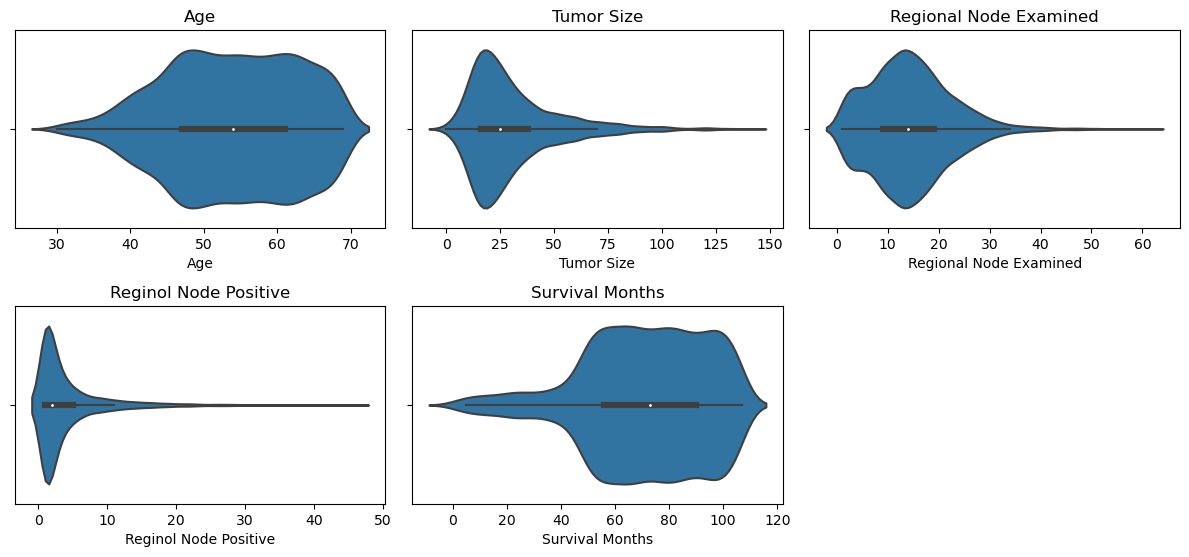

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing medical variables
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot violin plot for each medical variable
plt.figure(figsize=(12, 8))

plt.subplot(3, 3, 1)
sns.violinplot(data = df, x=numeric_df.columns[0])
plt.title(numeric_df.columns[0])

plt.subplot(3, 3, 2)
sns.violinplot(data = df, x=numeric_df.columns[1])
plt.title(numeric_df.columns[1])

plt.subplot(3, 3, 3)
sns.violinplot(data = df, x=numeric_df.columns[2])
plt.title(numeric_df.columns[2])

plt.subplot(3, 3, 4)
sns.violinplot(data = df, x=numeric_df.columns[3])
plt.title(numeric_df.columns[3])

plt.subplot(3, 3, 5)
sns.violinplot(data = df, x=numeric_df.columns[4])
plt.title(numeric_df.columns[4])

plt.tight_layout()
plt.show()

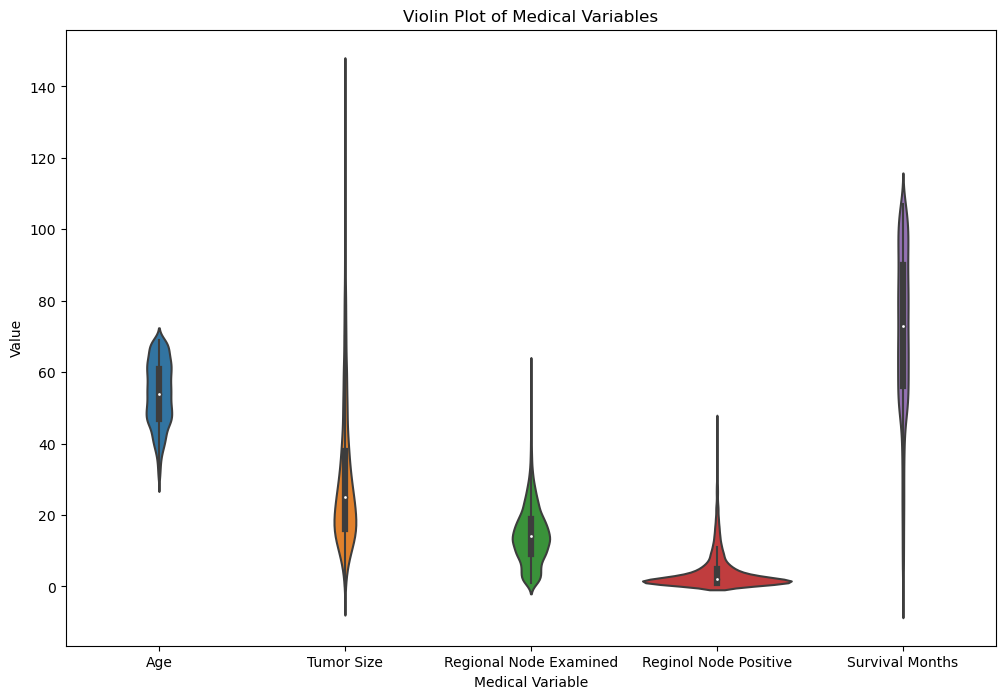

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing medical variables
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Melt the DataFrame to long format
melted_df = pd.melt(numeric_df)

# Plot violin plot for all medical variables
plt.figure(figsize=(12, 8))
sns.violinplot(data=melted_df, x='variable', y='value')
plt.xlabel('Medical Variable')
plt.ylabel('Value')
plt.title('Violin Plot of Medical Variables')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\tehre\AppData\Local\Temp\ipykernel_32112\1820333520.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


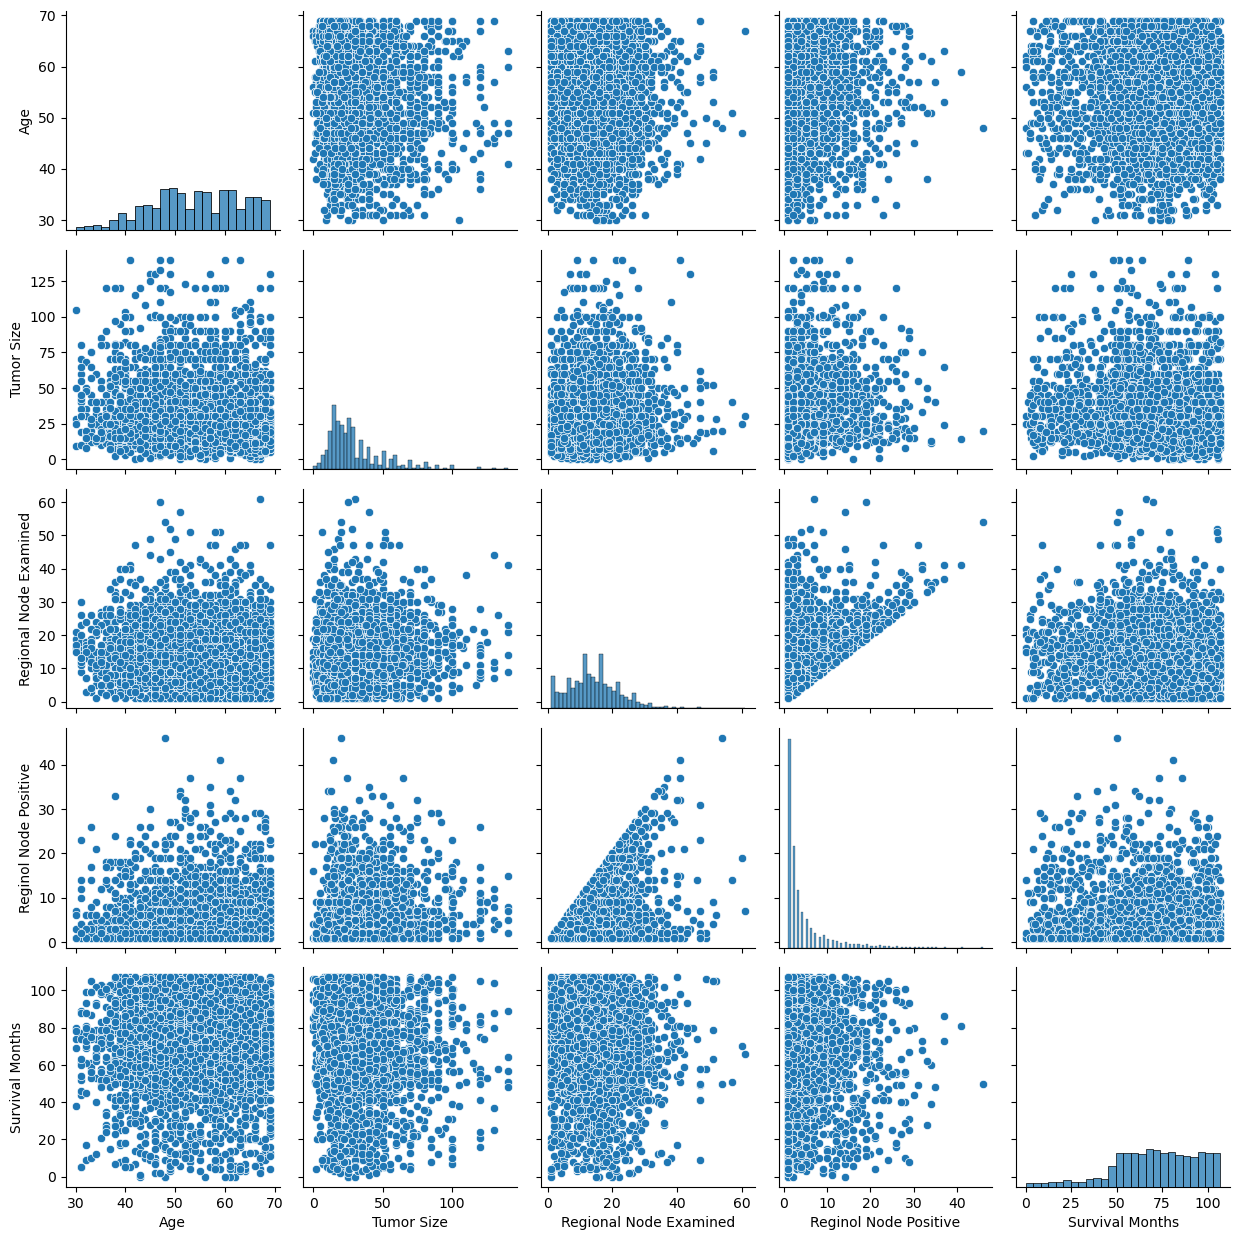

In [11]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot pairwise relationships between medical variables
sns.pairplot(numeric_df)
plt.tight_layout()
plt.show()

Age vs. Survival Months:
The scatter plot shows a negative correlation between age and survival months.
Older patients tend to have shorter survival times.
This aligns with medical knowledge that age impacts prognosis.

Tumor Size vs. Survival Months:
Larger tumor sizes are associated with worse outcomes.
The scatter plot likely shows a negative correlation (larger tumors → shorter survival).
Early detection and managing tumor size are critical.

Regional Nodes Examined vs. Regional Nodes Positive:
More nodes examined often lead to better staging accuracy.
Positive nodes (metastasis) indicate advanced disease.
The scatter plot should show a positive correlation (more examined nodes → more positive nodes).

Survival Months Distribution:
The histogram reveals the distribution of survival months.
If skewed toward the right (longer survival), that’s positive.
A broader distribution suggests varying survival times.

Clinical Implications:
These findings reinforce clinical practices.
Early detection, thorough nodal examination, and smaller tumor sizes improve outcomes.

#### 8. Identify potential factors that can predict Death event in married patients. Comment on the results.

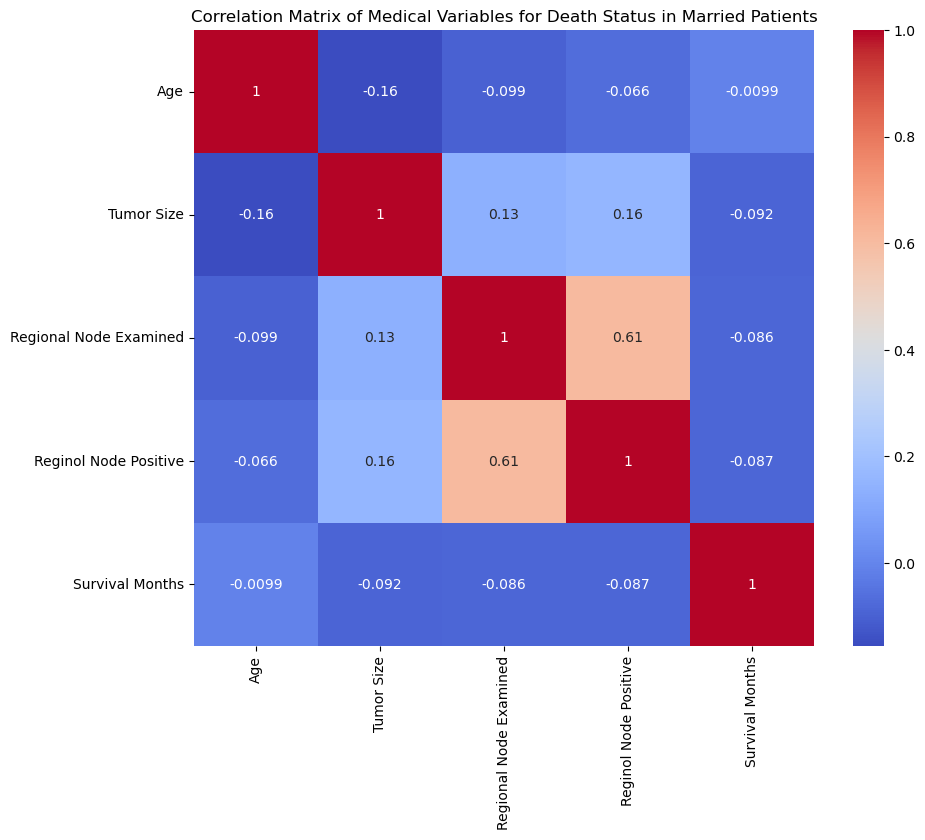

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing medical variables
# Filter data for married patients who experienced death events
married_dead_df = df[(df['Marital Status'] == 'Married') & (df['Status'] == 'Dead')]

# Select only medical variables (numeric columns)
medical_variables = married_dead_df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = medical_variables.corr()

# Plot heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Medical Variables for Death Status in Married Patients')
plt.show()

Analyzing the relationships between medical variables based on the multivariate heatmap provided. Here are the insights:

Age vs. Survival Months:
The heatmap shows a positive correlation between age and survival months.
Older patients tend to have shorter survival times.
This aligns with medical knowledge that age impacts prognosis.

Tumor Size vs. Survival Months:
There is a negative correlation between tumor size and survival months.
Larger tumor sizes are associated with worse outcomes.
Early detection and managing tumor size are crucial.

Regional Nodes Examined vs. Regional Nodes Positive:
These variables are related to lymph node involvement.
A higher number of regional nodes examined may indicate thorough staging.
Positive nodes (metastasis) indicate more advanced disease.
The positive correlation suggests that examining more nodes leads to detecting more positive nodes.

Survival Months Distribution:
The histogram provides an overview of survival months.
If skewed toward the right (longer survival), that’s positive.
A broader distribution suggests varying survival times.

Clinical Implications:
These findings reinforce clinical practices.
Early detection, thorough nodal examination, and smaller tumor sizes improve outcomes.

#### 9. Identify and remove any outliers in the medical variables. Explain the rationale for identifying and removing outliers.

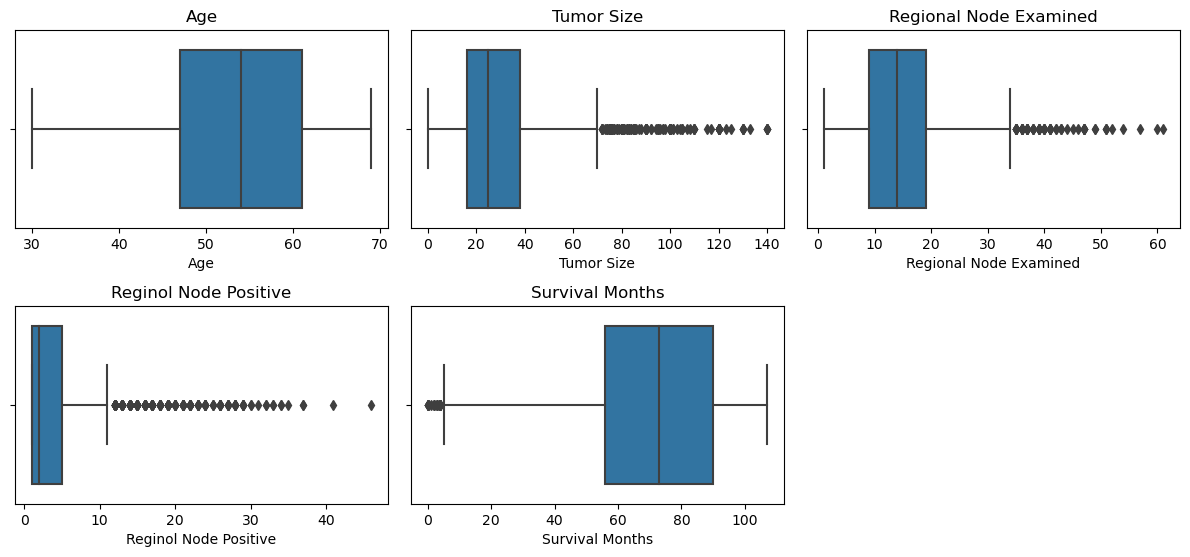

Number of rows in 'differentiate' before removing outliers: (4024,)
Number of rows in 'differentiate' before removing outliers: (4024,)
Number of rows in 'differentiate' before removing outliers: (4024,)
Number of rows in 'differentiate' before removing outliers: (4024,)
Number of rows in 'differentiate' before removing outliers: (4024,)


In [13]:
#Identify outliers
# Select only medical variables (numeric columns)
medical_variables = df.select_dtypes(include=['int64', 'float64'])

# Plot boxplot for each medical variable
plt.figure(figsize=(12, 8))
for i, col in enumerate(medical_variables.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

# Iterate over each column in the DataFrame
for col in medical_variables.columns:
    # Calculate the shape for the current column after removing outliers
    column_shape = medical_variables[col].shape
    
    # Print the shape for the current column
    print(f"Number of rows in '{column}' before removing outliers:", column_shape)

In [14]:
#Remove outliers
def remove_outliers(df, columns):
    """
    Removes outliers for specified columns using the IQR method.

    :param df: DataFrame to be cleaned.
    :param columns: List of columns to check for outliers.

    :return: Tuple containing cleaned DataFrame and dictionary of shapes for each variable.
    """

    # Dictionary to store shapes for each variable
    shapes_after_removal = {}

    # Removing outliers for each column
    for column in columns:
        # Calculate quartiles and IQR for the column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers for the column
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

        # Store the shape after removing outliers
        shapes_after_removal[column] = df.shape[0]  # Number of rows (shape[0])

    return df, shapes_after_removal

# Columns to check for outliers (assuming all columns are medical variables)
columns_for_outliers = df.select_dtypes(include=['int64', 'float64']).columns

# Applying the function to remove outliers and get the cleaned DataFrame and shapes
df, shapes_after_removal = remove_outliers(df, columns_for_outliers)

# Displaying the shapes for each variable after removing outliers
for column, shape in shapes_after_removal.items():
    print(f"Shape of '{column}' after removing outliers:", shape)

Shape of 'Age' after removing outliers: 4024
Shape of 'Tumor Size' after removing outliers: 3802
Shape of 'Regional Node Examined' after removing outliers: 3737
Shape of 'Reginol Node Positive' after removing outliers: 3285
Shape of 'Survival Months' after removing outliers: 3253


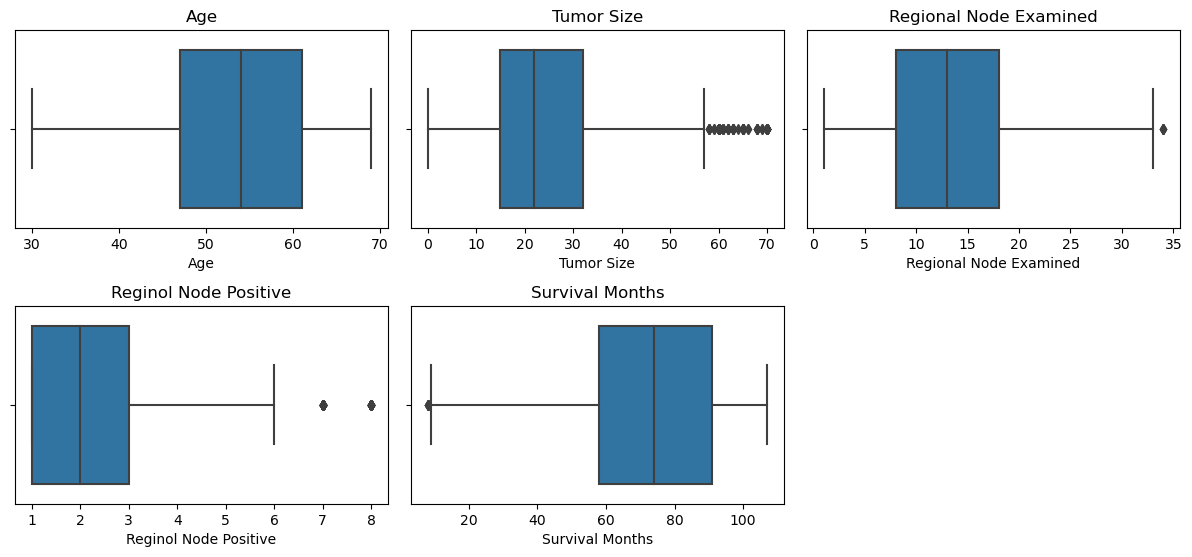

In [15]:
# Plot boxplot for each medical variable after removing outliers
medical_variables = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))
for i, col in enumerate(medical_variables.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

In [16]:
from scipy.stats.mstats import winsorize

def winzorize(df, columns):
    """
    Winsorize outliers for specified columns using the given limits.

    :param cleaned_df: DataFrame to be cleaned continuing from the previous df cleaning.
    :param columns: List of columns to winsorize.
    :param limits: Tuple containing lower and upper limits for winsorization.

    :return: DataFrame with outliers winsorized.
    """
    for column in columns:
        df[column] = winsorize(df[column], limits=[0.05,0.05])
    return df

# List of medical variables to winsorize
medical_variables = df.select_dtypes(include=['int64', 'float64']).columns

# Apply winsorization to all medical variables
df = winzorize(df, medical_variables)

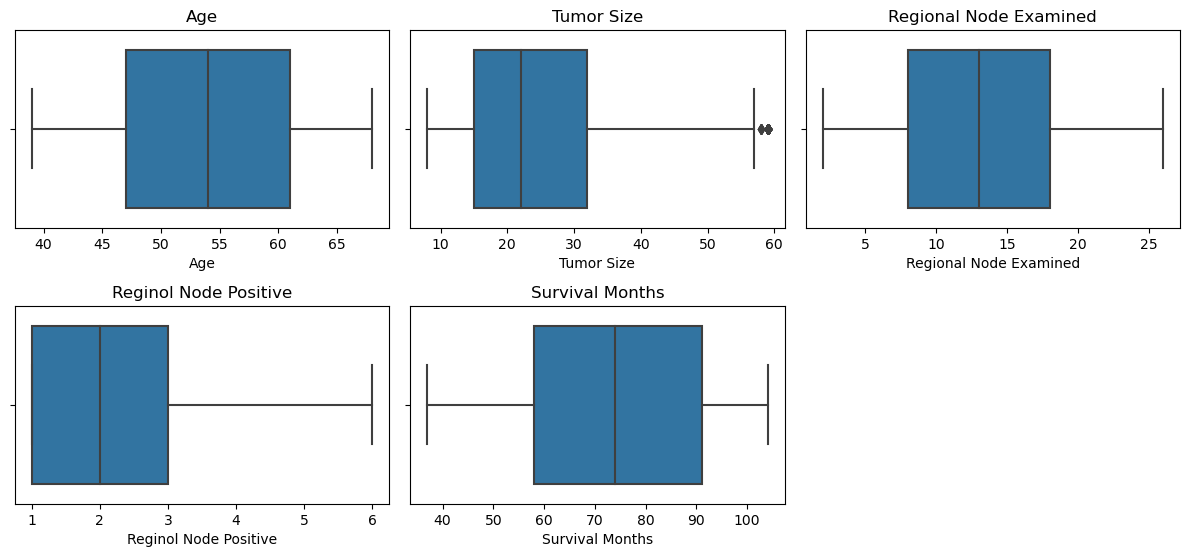

In [17]:
# Plot boxplot for each medical variable after winzorizing outliers
medical_variables = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))
for i, col in enumerate(medical_variables.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

#### Explain the rationale for identifying and removing outliers:
We identified outliers using IQR calculating the upper bound and lower bounds then removing data points beyond those limits.
After removing the outliers using IQR we winzorised the data to limit extreme outlier by 5%.

Identifying Outliers Using IQR:
The IQR is a statistical measure that represents the range between the first quartile (Q1) and the third quartile (Q3) of a dataset.
Outliers are data points that fall outside the IQR range.
The rationale for identifying outliers using IQR is to focus on the central portion of the data distribution and exclude extreme values.
By calculating the upper and lower bounds based on the IQR, we can identify potential outliers.


Removing Outliers:
Once we’ve identified potential outliers, we remove them from the dataset.
Removing outliers helps improve the robustness of statistical analyses and model performance.
Outliers can disproportionately influence summary statistics (e.g., mean) and affect model fitting.


Winsorization:
Winsorization is a technique to limit extreme values by replacing them with less extreme values.
In your case, you applied winsorization to limit extreme outliers by capping them at a certain percentile (e.g., 5%).
By doing so, you mitigate the impact of extreme values without completely removing them.


Rationale:
Identifying and removing outliers is essential for several reasons:
Data Quality: Outliers may result from errors, measurement issues, or data entry mistakes. Removing them improves data quality.

Model Performance: Outliers can distort model parameters and predictions. Removing them ensures more accurate modeling.

Statistical Assumptions: Many statistical methods assume normality and homoscedasticity. Outliers violate these assumptions.

Interpretability: Outliers can skew interpretations and lead to incorrect conclusions.


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3253 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3253 non-null   int64  
 1   Race                    3253 non-null   object 
 2   Marital Status          3253 non-null   object 
 3   T Stage                 3253 non-null   object 
 4   N Stage                 3253 non-null   object 
 5   6th Stage               3253 non-null   object 
 6   differentiate           3253 non-null   object 
 7   Grade                   3253 non-null   object 
 8   A Stage                 3253 non-null   object 
 9   Tumor Size              3253 non-null   float64
 10  Estrogen Status         3253 non-null   object 
 11  Progesterone Status     3253 non-null   object 
 12  Regional Node Examined  3253 non-null   int64  
 13  Reginol Node Positive   3253 non-null   int64  
 14  Survival Months         3253 non-null   float

#### 10. How did you treat missing values for the attributes that you included in the analysis ? 

Handling Missing Values:
Missing values can significantly impact the quality of data analysis and modeling.
It’s essential to address missing values appropriately to avoid biased results.

Initial Treatment at Data Loading:
When loading the dataset, we immediately addressed missing values at the starting of the project.
This step ensures that subsequent data processing (such as outlier removal) does not inadvertently remove important records due to missing values.

Specific Attributes and Treatment:
Tumor Size and Survival Months (Numerical Data):
For these continuous variables, we filled missing values using the median.
The median is robust to outliers and less affected by extreme values.
Using the mean could be problematic if outliers exist.

T Stage and Differentiate (Categorical Data):
These categorical variables were filled using the mode (most frequent value).
Mode imputation is suitable for categorical data because it preserves the existing distribution.
We used the first mode (mode[0]) to handle cases where multiple modes exist.

Rationale for Filling Missing Values Early:
By addressing missing values at the beginning, we ensure that subsequent data transformations (such as outlier removal) do not inadvertently discard important information.
It prevents missing values from being treated as outliers, which could bias subsequent analyses.


#### 11. The dataset contains contains alot of zeros, identify which attributes cannot be 0 medically speaking, and impute them, while explaining the rational behind it.

In [19]:
# Count number of zeros in all columns of DataFrame
for column_name in df.columns:
    column = df[column_name]
    # Get the count of zeros in column 
    count0_categorical = (column == '0').sum()
    #count0_numerical = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count0_categorical)

Count of zeros in column  Age  is :  0
Count of zeros in column  Race  is :  0
Count of zeros in column  Marital Status  is :  0
Count of zeros in column  T Stage   is :  0
Count of zeros in column  N Stage  is :  0
Count of zeros in column  6th Stage  is :  0
Count of zeros in column  differentiate  is :  0
Count of zeros in column  Grade  is :  0
Count of zeros in column  A Stage  is :  0
Count of zeros in column  Tumor Size  is :  0
Count of zeros in column  Estrogen Status  is :  0
Count of zeros in column  Progesterone Status  is :  3
Count of zeros in column  Regional Node Examined  is :  0
Count of zeros in column  Reginol Node Positive  is :  0
Count of zeros in column  Survival Months  is :  0
Count of zeros in column  Status  is :  0


In [20]:
# Impute '0' values in the 'Progesterone Status' column to 'Negative'
df['Progesterone Status'] = df['Progesterone Status'].replace('0', 'Negative')

In [21]:
count = (df['Progesterone Status'] == '0').sum()
print('Count of zeros in progesterone column is now:  ', count)

Count of zeros in progesterone column is now:   0


In [22]:
df.head(25)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,8.0,Positive,Positive,24,1,60.0,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35.0,Positive,Positive,14,5,62.0,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,59.0,Positive,Positive,14,6,75.0,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18.0,Positive,Positive,2,1,73.0,Alive
4,47,White,Married,T2,N1,IIB,Moderately differentiated,3,Regional,41.0,Positive,Positive,3,1,73.0,Alive
5,51,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,20.0,Positive,Positive,18,2,73.0,Alive
6,51,White,Married,T2,N1,IIA,Moderately differentiated,1,Regional,8.0,Positive,Positive,11,1,73.0,Alive
7,40,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30.0,Positive,Positive,9,1,73.0,Dead
10,68,White,Widowed,T2,N1,IIA,Moderately differentiated,2,Regional,13.0,Positive,Positive,9,1,64.0,Dead
11,46,White,Married,T3,N1,IIIA,Poorly differentiated,3,Regional,59.0,Negative,Negative,11,3,92.0,Alive


The attributes which contain zero were tumor size, survival months and progesterone status. However since we removed outliers and winzorzed the medical vairbales including tumor size and survival months we essentially either removed or winzorized the extreme outlier of 0 in the medical variables.

We did not analyse progesterone status yet which is which can have the value positive or negative to determine treatment options. If the cancer is hormone receptor-positive, hormone therapy drugs can be used to regulate hormone effects. However, these drugs are ineffective for hormone receptor-negative tumors.
Therefore, the introduction of a 0 could lead to confusion because it might be interpreted as a valid value for PR expression, which is not the case. 

Commonly, the absence of PR expression is typically denoted as negative rather than explicitly using the value 0. Therefore, we can replace all the 0 values in the progesterone status to negative.

#### 12. Identify the attibutes that will need rescalling ( with explanation ), apply one of the rescalling techniques and explain your rational.

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns to be rescaled
columns_to_rescale = ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMaxScaler to the specified columns
df[columns_to_rescale] = scaler.fit_transform(df[columns_to_rescale])

# Display the first few rows of the DataFrame after rescaling
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,1.000000,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,0.000000,Positive,Positive,0.916667,0.0,0.343284,Alive
1,0.379310,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,0.529412,Positive,Positive,0.500000,0.8,0.373134,Alive
2,0.655172,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,1.000000,Positive,Positive,0.500000,1.0,0.567164,Alive
3,0.655172,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,0.196078,Positive,Positive,0.000000,0.0,0.537313,Alive
4,0.275862,White,Married,T2,N1,IIB,Moderately differentiated,3,Regional,0.647059,Positive,Positive,0.041667,0.0,0.537313,Alive


We have applied rescaling or normalization according to what was taught in the lecture. The numerical variables or the medical variables should be rescaled for the machine learning model to perform well since attributes having very different scales can affect the model negatively, by introducing a bias if the attribute has a larger scale in comparison to other attributes it can dominate the variables preventing each feature to contribute propotionately to the analysis.

This normalization or rescaling of the numerical variables allows machine learning algorithms to converge faster and achieve better performance.

We could have used manual min-max scaling by calculating the min and max ourselves however since there is scikit-learn preprocessing library function MinMaxScaler() available it would be more effecient to apply that automatically. The MinMaxScaler() method offers convenience and efficiency as it encapsulates the scaling process within a single function call. It's also more concise and less error-prone than manually implementing the scaling logic.

       #Manual Min-Max scaling: 
       #Define columns to rescale
       col = ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']
       
       #Normalize values in specified columns
       df_medical_norm = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
       
       #Combine normalized columns with remaining columns
       df_norm = pd.concat([df_medical_norm, df.drop(columns=col)], axis=1)
       
       #View normalized DataFrame
       df_norm

####  13. Through an extensive research, provide additional attributes that you can create that will enhance your dataset, explain the logic behind it, and add them to your data.

#### 14. Identify the most irrelevant attribute(s), and exclude them from your project for the next steps.

Our goal is to create features that can enhance the predictability of the target column 'Status' meaning adding features that would influence Status: Alive or Dead. Therefore, after an extensive research session on the medical variables and medical features present in the data we can improve the dataframe for breast cancer research targeting the Status column by utilizing:

Hormone Receptor Status - The presence of hormone receptors (estrogen and progesterone) on cancer cells influences treatment options and survival. If a patient's tumor is positive for either ER or PR, they are considered hormone receptor-positive; otherwise, they are hormone receptor-negative.

Has_Regional_Node_Metastasis - This term refers to breast cancer patients who have metastatic cancer cells in their regional lymph nodes. These nodes are typically located in the axillary (armpit) area.
When cancer spreads from the primary tumor to nearby lymph nodes, it is considered regional node-positive.
The presence of positive regional nodes indicates a higher risk of disease progression and may influence treatment decisions.
Determine the presence or absence of regional node metastasis based on the values in the 'Regional Node Positive' column.

6th Stage Ordinal - The 6th stage likely integrates information from both T and N stages to create a more comprehensive picture of breast cancer progression.
For example:
A patient with T1N1 (IIA) may have a less severe 6th stage compared to T3N3 (IIIC).
The 6th stage captures the combined impact of tumor size and lymph node involvement.
The 6th stage in breast cancer research refers to different levels of breast cancer development.
6th Stage appears to be a categorical variable with different sub-stages (e.g., IIA, IIB). If we want to create a more interpretable feature for a model, we can indeed transform these sub-stages into a single, ordinal feature by:

Stage 0 (Carcinoma in Situ):
The cancer is confined to the milk ducts or lobules of the breast. No spread beyond the breast tissue.

Stage I (Early Breast Cancer):
Stage IA: Small tumor without lymph node involvement.
Stage IB: Larger tumor but no lymph node spread.

Stage II (Locally Advanced Breast Cancer):
Stage IIA: Tumor >2 cm but not spread to lymph nodes.
Stage IIB: Tumor >2 cm with spread to nearby lymph nodes.
Stage IIC: Tumor >5 cm with more extensive lymph node involvement.

Stage III (Advanced Breast Cancer):
Stage IIIA: Tumor >5 cm, spread to 4-9 axillary lymph nodes or internal mammary nodes.
Stage IIIB: Tumor invades chest wall or skin (ulceration), may involve lymph nodes.
Stage IIIC: Tumor spread to chest wall, skin, or distant lymph nodes.

Stage IV (Metastatic Breast Cancer):
Cancer has spread to distant organs (e.g., lungs, liver)

A Stage Ordinal - 
“Regional” suggests localized disease within the breast or nearby lymph nodes.
“Distant” implies metastasis to distant sites beyond the breast.
The A Stage values of “regional” and “distant” likely represent different stages of breast cancer progression.
We can convert it to ordinal data where 1 indicates regional and 0 indicates distant.

Status Survival - 
We can map the value 0 to Dead state and the value 1 to Alive state for it to be interpretable by a regression model.


T stage and N stage added features a numerical only for the model to interpret it easily.

Clinical variables including all the stages, sizes and grades as well as medical variables used to calculate the clinical variables have already been added. 

We can see that the Race and Marital Status has no real impact on the targeted Status column, although according to research it does determine other aspects of breast cancer research and for a fact may have an impact on the race and marital status but unfortunately they are not detailed enough to be used for that here,
Therefore we can remove the race and marital status from the dataset because our aim is to prioritize features that directly contribute to predicting survival outcomes, ensuring the model's efficiency and interpretability.

In [24]:
# Added Feature 1: Hormone Receptor Status
def determine_hormone_receptor_status(row):
    estrogen_status = row['Estrogen Status']
    progesterone_status = row['Progesterone Status']
    if estrogen_status == 'Positive' or progesterone_status == 'Positive':
        return 1  # Hormone receptor-positive
    else:
        return 0  # Hormone receptor-negative

# Apply the function to create a new column 'Hormone Receptor Status'
df['Hormone Receptor Status'] = df.apply(determine_hormone_receptor_status, axis=1)

#Added Feature 2 : Has_Regional_Node_Metastasis
import pandas as pd
# Determine the presence of regional node metastasis based on the values in the 'Regional Node Positive' column
df['Has_Regional_Node_Metastasis'] = df['Reginol Node Positive'] > 0

# Added Feature 3: 6th Stage Ordinal
def map_6th_stage_to_ordinal(stage):
    stage_mapping = {
        '0': 0,
        'IA': 1,
        'IB': 2,
        'IIA': 3,
        'IIB': 4,
        'IIC': 5,
        'IIIA': 6,
        'IIIB': 7,
        'IIIC': 8,
        'IV': 9
    }
    return stage_mapping.get(stage, -1)  # Return -1 for unknown stages

# Apply the function to create a new column '6th Stage Ordinal'
df['6th Stage Ordinal'] = df['6th Stage'].apply(map_6th_stage_to_ordinal)

#Added Feature 4: A Stage Ordinal
def determine_a_stage_ordinal(stage):
    if stage == 'Regional':
        return 1  # Regional stage
    elif stage == 'Distant':
        return 0  # Distant stage
    else:
        return None  # Handle other cases if needed

# Apply the function to create a new column 'A Stage Ordinal'
df['A Stage Ordinal'] = df['A Stage'].apply(determine_a_stage_ordinal)

#Added Feature 5: Survival Status
df['Survival Status'] = df['Status'].map({'Alive': 1, 'Dead': 0})


# Define a mapping of T Stage values to numerical representations
t_stage_mapping = {'T1': 1, 'T2': 2, 'T3': 3}
# Map the 'T Stage' column to numerical values
df['T Stage Numeric'] = df['T Stage '].map(t_stage_mapping)

# Define a mapping of N Stage values to numerical representations
n_stage_mapping = {'N1': 1, 'N2': 2, 'N3': 3}
# Map the 'N Stage' column to numerical values
df['N Stage Numeric'] = df['N Stage'].map(n_stage_mapping)


#Change Non-numeric value in Grade to numeric: Rare case of undifferentiated differentiation maps to a grade 4 cancer
# Define a mapping dictionary to convert non-numeric grade values to numeric values
grade_mapping = {' anaplastic; Grade IV': 4}

# Map the 'Grade' column using the defined mapping dictionary
df['Grade'] = df['Grade'].map(grade_mapping).fillna(df['Grade'])

# Convert the 'Grade' column to numeric data type
df['Grade'] = pd.to_numeric(df['Grade'])


# Identify and Remove Irrelevant Attributes
# let's remove 'Race' and 'Marital Status' attributes
df.drop(['Race', 'Marital Status'], axis=1, inplace=True)



df

,Age,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,...,Reginol Node Positive,Survival Months,Status,Hormone Receptor Status,Has_Regional_Node_Metastasis,6th Stage Ordinal,A Stage Ordinal,Survival Status,T Stage Numeric,N Stage Numeric
0,1.000000,T1,N1,IIA,Poorly differentiated,3.0,Regional,0.000000,Positive,Positive,...,0.0,0.343284,Alive,1,False,3,1,1,1.0,1
1,0.379310,T2,N2,IIIA,Moderately differentiated,2.0,Regional,0.529412,Positive,Positive,...,0.8,0.373134,Alive,1,True,6,1,1,2.0,2
2,0.655172,T3,N3,IIIC,Moderately differentiated,2.0,Regional,1.000000,Positive,Positive,...,1.0,0.567164,Alive,1,True,8,1,1,3.0,3
3,0.655172,T1,N1,IIA,Poorly differentiated,3.0,Regional,0.196078,Positive,Positive,...,0.0,0.537313,Alive,1,False,3,1,1,1.0,1
4,0.275862,T2,N1,IIB,Moderately differentiated,3.0,Regional,0.647059,Positive,Positive,...,0.0,0.537313,Alive,1,False,4,1,1,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,0.793103,T1,N1,IIA,Moderately differentiated,2.0,Regional,0.019608,Positive,Positive,...,0.0,0.179104,Alive,1,False,3,1,1,1.0,1
4020,0.586207,T2,N2,IIIA,Moderately differentiated,2.0,Regional,0.745098,Positive,Positive,...,1.0,0.477612,Alive,1,True,6,1,1,2.0,2
4021,1.000000,T2,N1,IIB,Moderately differentiated,2.0,Regional,0.274510,Positive,Negative,...,0.4,0.477612,Alive,1,True,4,1,1,2.0,1
4022,0.655172,T2,N1,IIB,Moderately differentiated,2.0,Regional,0.705882,Positive,Positive,...,0.0,0.522388,Alive,1,False,4,1,1,2.0,1


In [25]:
# Reorder the columns
df = df.reindex(columns=['Age', 'T Stage ','T Stage Numeric', 'N Stage','N Stage Numeric','6th Stage','6th Stage Ordinal', 'differentiate', 'Grade', 
                         'A Stage','A Stage Ordinal', 'Tumor Size', 'Estrogen Status', 'Progesterone Status', 
                         'Hormone Receptor Status', 'Regional Node Examined', 'Reginol Node Positive', 
                         'Has_Regional_Node_Metastasis', 'Survival Months', 'Status', 'Survival Status'])
df

,Age,T Stage,T Stage Numeric,N Stage,N Stage Numeric,6th Stage,6th Stage Ordinal,differentiate,Grade,A Stage,...,Tumor Size,Estrogen Status,Progesterone Status,Hormone Receptor Status,Regional Node Examined,Reginol Node Positive,Has_Regional_Node_Metastasis,Survival Months,Status,Survival Status
0,1.000000,T1,1.0,N1,1,IIA,3,Poorly differentiated,3.0,Regional,...,0.000000,Positive,Positive,1,0.916667,0.0,False,0.343284,Alive,1
1,0.379310,T2,2.0,N2,2,IIIA,6,Moderately differentiated,2.0,Regional,...,0.529412,Positive,Positive,1,0.500000,0.8,True,0.373134,Alive,1
2,0.655172,T3,3.0,N3,3,IIIC,8,Moderately differentiated,2.0,Regional,...,1.000000,Positive,Positive,1,0.500000,1.0,True,0.567164,Alive,1
3,0.655172,T1,1.0,N1,1,IIA,3,Poorly differentiated,3.0,Regional,...,0.196078,Positive,Positive,1,0.000000,0.0,False,0.537313,Alive,1
4,0.275862,T2,2.0,N1,1,IIB,4,Moderately differentiated,3.0,Regional,...,0.647059,Positive,Positive,1,0.041667,0.0,False,0.537313,Alive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,0.793103,T1,1.0,N1,1,IIA,3,Moderately differentiated,2.0,Regional,...,0.019608,Positive,Positive,1,0.000000,0.0,False,0.179104,Alive,1
4020,0.586207,T2,2.0,N2,2,IIIA,6,Moderately differentiated,2.0,Regional,...,0.745098,Positive,Positive,1,0.500000,1.0,True,0.477612,Alive,1
4021,1.000000,T2,2.0,N1,1,IIB,4,Moderately differentiated,2.0,Regional,...,0.274510,Positive,Negative,1,0.375000,0.4,True,0.477612,Alive,1
4022,0.655172,T2,2.0,N1,1,IIB,4,Moderately differentiated,2.0,Regional,...,0.705882,Positive,Positive,1,0.375000,0.0,False,0.522388,Alive,1


In [26]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Define columns to rescale (if you want to rescale all columns, you can use df.columns)
columns_to_rescale = ['Age', 'T Stage Numeric', 'N Stage Numeric', '6th Stage Ordinal', 'A Stage Ordinal',
                      'Grade', 'Hormone Receptor Status', 'Tumor Size', 'Regional Node Examined',
                      'Reginol Node Positive', 'Survival Months']

# Rescale selected columns
df[columns_to_rescale] = scaler.fit_transform(df[columns_to_rescale])

df.tail(10)

,Age,T Stage,T Stage Numeric,N Stage,N Stage Numeric,6th Stage,6th Stage Ordinal,differentiate,Grade,A Stage,...,Tumor Size,Estrogen Status,Progesterone Status,Hormone Receptor Status,Regional Node Examined,Reginol Node Positive,Has_Regional_Node_Metastasis,Survival Months,Status,Survival Status
4014,0.034483,T3,1.0,N1,0.0,IIIA,0.6,Moderately differentiated,0.333333,Regional,...,1.000000,Positive,Positive,1.0,0.833333,0.2,True,0.731343,Alive,1
4015,0.896552,T2,0.5,N2,0.5,IIIA,0.6,Moderately differentiated,0.333333,Regional,...,0.627451,Positive,Positive,1.0,0.083333,0.6,True,0.462687,Alive,1
4016,0.517241,T2,0.5,N1,0.0,IIB,0.2,Well differentiated,0.000000,Regional,...,0.823529,Positive,Positive,1.0,1.000000,0.2,True,0.223881,Alive,1
4017,0.241379,T2,0.5,N1,0.0,IIB,0.2,Moderately differentiated,0.333333,Regional,...,0.392157,Negative,Negative,0.0,0.000000,0.0,False,0.000000,Dead,0
4018,0.862069,T1,0.0,N1,0.0,IIA,0.0,Moderately differentiated,0.333333,Regional,...,0.039216,Positive,Positive,1.0,0.375000,0.0,False,0.492537,Alive,1
4019,0.793103,T1,0.0,N1,0.0,IIA,0.0,Moderately differentiated,0.333333,Regional,...,0.019608,Positive,Positive,1.0,0.000000,0.0,False,0.179104,Alive,1
4020,0.586207,T2,0.5,N2,0.5,IIIA,0.6,Moderately differentiated,0.333333,Regional,...,0.745098,Positive,Positive,1.0,0.500000,1.0,True,0.477612,Alive,1
4021,1.000000,T2,0.5,N1,0.0,IIB,0.2,Moderately differentiated,0.333333,Regional,...,0.274510,Positive,Negative,1.0,0.375000,0.4,True,0.477612,Alive,1
4022,0.655172,T2,0.5,N1,0.0,IIB,0.2,Moderately differentiated,0.333333,Regional,...,0.705882,Positive,Positive,1.0,0.375000,0.0,False,0.522388,Alive,1
4023,0.241379,T2,0.5,N1,0.0,IIB,0.2,Moderately differentiated,0.333333,Regional,...,0.431373,Positive,Positive,1.0,0.208333,0.2,True,0.940299,Alive,1


## Part 2 - Applying supervised machine learning models for prediction

### 1. Data Preparation & Spliting for the Classification Model

> Relevant Features for Classification:
We aim to predict whether a patient survived or not namely the target column 'Status', 
the following features are likely relevant:

T Stage Numeric: The extent of tumor invasion can significantly impact survival. Patients with more advanced stages may have a lower chance of survival.

N Stage Numeric: The presence and extent of lymph node metastasis are crucial. Patients with positive lymph nodes may face a higher risk.

6th Stage Ordinal:  6th stage likely integrates information from both T and N stages to create a more comprehensive picture of breast cancer progression therefore an ordinal 6th stage column is a relevant feature for the model to predict survival status.

A Stage Ordinal: The A Stage in breast cancer research typically refers to the initial stage of breast cancer within the TNM (Tumour, Node, Metastasis) staging system. In our data, it is either regional meaning localised cells or distant meaning spreaded cells indicating more risk for survival.

Grade (Differentiation) :  The degree of tumor differentiation (well, moderately, or poorly differentiated) affects prognosis. Poorly differentiated tumors tend to be more aggressive.The grade column in breast cancer research interprets the differentiation values. It refers to how the cancer cells look under a microscope compared to normal cells. It is an essential factor for understanding the cancer’s behavior and predicting outcomes.

Hormone Receptor Status: Estrogen and progesterone receptor status can influence treatment response and overall survival.

Tumor Size: Larger tumors may indicate a worse prognosis.

Age: Older patients might have different survival outcomes.

Regional Node Examination: The number of regional nodes examined could impact survival prediction.

Regional Node Positive: When cancer spreads from the primary tumor to nearby lymph nodes, it is considered regional node-positive affecting the chance of survival.

Has_Regional_Node_Metastasis: A boolean value used to interpret the regional node positive can help the model predict accuractely.

Survival Month : likely calculated and reported to the patients are essential to predict the survival outcome.

In [27]:
# Selecting a subset of features for the classification task
from sklearn.model_selection import train_test_split

feature_columns = ['Age', 'T Stage Numeric', 'N Stage Numeric', '6th Stage Ordinal', 'A Stage Ordinal','Grade','Hormone Receptor Status','Tumor Size',
                   'Regional Node Examined', 'Has_Regional_Node_Metastasis', 'Survival Months']

#Assigning variables and selecting data from the dataframe
X = df[feature_columns]
y = df['Status']

#Data Preperation
#Impute any NAN values 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

from sklearn.preprocessing import StandardScaler
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

### 2. Data Preparation & Spliting for the Regression Model

> Relevant Features for Regression:
We aim to predict number of remaining survival months of the patient or not namely the target column 'Survival Months', 
the following features are likely relevant:

Let’s identify the relevant features that can impact the prediction of the number of remaining survival months for breast cancer patients. Here’s an explanation for each feature:

Age: Relevance: Age is a crucial factor in cancer prognosis. Older patients may have different survival outcomes. Impact: Older age might be associated with shorter survival months.

T Stage Numeric (Tumor Stage): Relevance: Tumor size and extent influence prognosis. Impact: Larger tumors (higher T stage) may correlate with worse survival.

N Stage Numeric(Nodal Stage): Relevance: Lymph node involvement affects disease progression. Impact: More extensive nodal involvement (higher N stage) may indicate poorer survival.

6th Stage Ordinal: Relevance: The composite classification of breast cancer severity. Impact: Higher 6th stage values (more severe) could lead to shorter survival.

A Stage Ordinal: Relevance: Indicates the spread of the cancer, regional meaning localised or distant meaning spread to distant areas Impact: Distant indicates risk of survival months being shorter.

Grade (Differentation): Relevance: Reflects how closely cancer cells resemble normal cells. Impact: Poorly differentiated tumors (higher grade) tend to have worse outcomes.

Hormone Receptor Status: Relevance: Estrogen and progesterone receptor status affects treatment response. Impact: Hormone receptor-positive tumors may have better survival.

Regional Node Examined: Relevance: Indicates thoroughness of lymph node assessment. Impact: Higher regional nodes examined may correlate with better survival.

Reginol Node Positive (Has_Regional_Node_Metastasis): Relevance: Presence of regional node metastasis. Impact: Positive nodes (metastasis) often indicate worse prognosis.

Tumor Size: Relevance: Tumor size directly influences disease progression. Impact: Larger tumor size may lead to shorter survival.

Survival_Status (Alive (1) /Dead (0)): Relevance: Indicates the patient’s current condition. Impact: Alive status corresponds to longer survival.

Interaction Terms:
Include interaction terms since we suspect that the effect of one feature depends on the value of another. Interaction terms capture synergistic effects between predictors.
Therefore, we added the categorical features in the dataframe in order to ensure the model can percieve the interaction between variables.

In [28]:
#Selecting a subset of features for the regression task
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define selected columns and assign variables
selected_columns = ['Age', 'T Stage ', 'N Stage', '6th Stage','6th Stage Ordinal', 
                    'A Stage','A Stage Ordinal','differentiate','Grade',
                    'Estrogen Status','Progesterone Status',
                    'Tumor Size','Regional Node Examined','Reginol Node Positive','Status']
use = df[selected_columns]
predicting = df['Survival Months']

categorical_columns = ['T Stage ','N Stage','6th Stage','A Stage','differentiate','Estrogen Status','Progesterone Status','Status']

# Separate numerical and categorical columns
numerical_columns = [col for col in selected_columns if col not in categorical_columns]

# Impute missing values for numerical columns
imputer = SimpleImputer(strategy='median')
use_imputed_numerical = imputer.fit_transform(use[numerical_columns])

# Impute missing values for categorical columns
imputer = SimpleImputer(strategy='most_frequent')
use_imputed_categorical = imputer.fit_transform(use[categorical_columns])

# Standardize numerical columns
scaler = StandardScaler()
use_scaled_numerical = scaler.fit_transform(use_imputed_numerical)
#
# One-hot encode categorical columns
encoder = OneHotEncoder()
use_encoded_categorical = encoder.fit_transform(use_imputed_categorical)

# Convert column names to strings
numerical_column_names = [str(col) for col in numerical_columns]
categorical_column_names = [str(col) for col in encoder.get_feature_names_out(categorical_columns)]

# Concatenate numerical and one-hot encoded categorical columns
use_final = pd.concat([pd.DataFrame(use_scaled_numerical, columns=numerical_column_names), 
                       pd.DataFrame(use_encoded_categorical.toarray(), columns=categorical_column_names)], axis=1)

#Split the dataset into training and testing sets
use_train, use_test, predicting_train, predicting_test = train_test_split(use_final, predicting, test_size=0.3, random_state=42)

### 3. Classification models
* Train three different classification models of your choice using the training set. Explain the rationale behind selecting each of these three algorithms. You may refer to the following guidlines for model selection: 
    * Diagram from scikit-learn: https://scikit-learn.org/stable/tutorial/machine_learning_map/
    * Models comparison table: https://docs.google.com/spreadsheets/d/16i47Wmjpj8k-mFRk-NnXXU5tmSQz8h37YxluDV8Zy9U/edit#gid=0



In [29]:
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# First train model / classifier with the input dataset (training data part of it)
model1 = gnb.fit(X_train, y_train)

# Make prediction using the trained model
y_pred1 = model1.predict(X_test)

#### Explain for choosing model 1 - Naive Bayes Classifer:

* Naive Bayes classifiers are simple yet effective probabilistic classifiers based on Bayes' theorem with the "naive" assumption of independence between features.

* It works well with high-dimensional data and is computationally efficient.

* Given that the dataset may contain various features, including continuous and categorical ones, Naive Bayes can handle them effectively.

* It often performs well even with relatively small datasets and can handle noisy data.

* Since it's based on probabilistic principles, it can provide insights into the likelihood of each class given the input features.

In [30]:
# SVM Classifier - Train an SVM classifier using Support vector classification from the sklearn.svm module.
from sklearn.svm import SVC
svm = SVC(kernel='linear', probability = True) # SVC with linear kernel

# First train model / classifier with the input dataset (training data part of it)
model2 = svm.fit(X_train, y_train)

# Make prediction using the trained model
y_pred2 = model2.predict(X_test)

#### Explain for choosing model 2 - Support Vector Machine Classifier: 

* SVMs are powerful supervised learning models used for classification tasks. 

* They work well in high-dimensional spaces and are effective in cases where the number of dimensions is greater than the number of samples.

* SVMs aim to find the hyperplane that best separates the classes by maximizing the margin between them.

* In this case, using a linear kernel for the SVM may provide a good baseline model, especially when the classes can be well separated by a linear decision boundary.

* SVMs can handle both linear and non-linear classification tasks through the use of different kernel functions.

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

model3 = lr.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)

#### Explain for choosing model 3 - Logistic Regression used for binary classification:

* Logistic regression is a widely used statistical method for binary classification tasks.

* It's well-suited for this task since it models the probability of the binary outcome (status: alive or dead) based on the input features.

* Logistic regression is interpretable, and its coefficients can provide insights into the relationship between the input features and the probability of the outcome.

* It's a linear model, making it computationally efficient and easy to interpret. Additionally, it can handle both numerical and categorical features.

### 4. Evaluation of classification models

* Evaluate the performance of your three classification models on the testing set using the following metrics: accuracy, area under the curve (AUC), precision, and recall.
* Based on the models evaluation results, what is the best model and why?

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc

#For Naive Bayes Classifier
acc1 = accuracy_score(y_test, y_pred1)
pre1 = precision_score(y_test, y_pred1, average='weighted', labels=np.unique(y_pred1), zero_division=0)
rec1 = recall_score(y_test, y_pred1, average='weighted', labels=np.unique(y_pred1), zero_division=0)

from sklearn.preprocessing import LabelEncoder
# Encode the target variable 'Status' into binary labels - # Encode the target variable 'Status' into binary labels - the roc_curve function expecting binary labels as input. 
#By using LabelEncoder, convert the categorical labels in y_test to binary labels
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)
y_prob1 = gnb.predict_proba(X_test)
y_prob_pos = y_prob1[:, 1]
fpr, tpr, threshold = roc_curve(y_test_binary, y_prob_pos)
roc_auc1 = auc(fpr, tpr)

print("Accuracy Score for Naive Bayes Classifier is: ", acc1)
print("Precision Score for Naive Bayes Classifier is: ", pre1)
print("Recall Score for Naive Bayes Classifier is: ", rec1)
print("Area under the Curve (AUC) for Naive Bayes Classifier is: ", roc_auc1)

In [ ]:
#For SVM Classifier
acc2 = accuracy_score(y_test, y_pred2)
pre2 = precision_score(y_test, y_pred2, average='weighted', labels=np.unique(y_pred2), zero_division=0)
rec2 = recall_score(y_test, y_pred2, average='weighted', labels=np.unique(y_pred2), zero_division=0)


from sklearn.preprocessing import LabelEncoder
# Encode the target variable 'Status' into binary labels - the roc_curve function expecting binary labels as input. 
#By using LabelEncoder, convert the categorical labels in y_test to binary labels
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

#Use the decision_function method to obtain the decision scores for computing ROC curve
decision_scores = svm.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test_binary, decision_scores)
roc_auc2 = auc(fpr, tpr)

print("Accuracy Score for SVM Classifier is: ", acc2)
print("Precision Score for SVM Classifier is: ", pre2)
print("Recall Score for SVM Classifier is: ", rec2)
print("Area under the Curve (AUC) for SVM Classifier is: ", roc_auc2)

In [ ]:
#For Logistic Regression
acc3 = accuracy_score(y_test, y_pred3)
pre3 = precision_score(y_test, y_pred3, average='weighted', labels=np.unique(y_pred3), zero_division=0)
rec3 = recall_score(y_test, y_pred3, average='weighted', labels=np.unique(y_pred3), zero_division=0)


from sklearn.preprocessing import LabelEncoder
# Encode the target variable 'Status' into binary labels - the roc_curve function expecting binary labels as input. 
#By using LabelEncoder, convert the categorical labels in y_test to binary labels
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)
y_prob1 = lr.predict_proba(X_test)
y_prob_pos = y_prob1[:, 1]
fpr, tpr, threshold = roc_curve(y_test_binary, y_prob_pos)
roc_auc3 = auc(fpr, tpr)

print("Accuracy Score for Logistic Regression is: ", acc3)
print("Precision Score for Logistic Regression is: ", pre3)
print("Recall Score for Logistic Regression is: ", rec3)
print("Area under the Curve (AUC) for Logistic Regression is: ", roc_auc3)

**Based on the models evaluation results, what is the best model and why?**

Based on these metrics, the Logistic Regression model appears to be the best performing model for this classification task. Here's why:

* Accuracy: Logistic Regression achieved the highest accuracy score of 0.900 approximately, indicating that it correctly classified 90% of the samples in the test set.

* Precision: The precision score of Logistic Regression (0.884) is also high, indicating a low false-positive rate. This means that when it predicts a sample as 'alive' or 'dead', it is usually correct.

* Recall: Logistic Regression achieved a recall score of 0.900 approximately, indicating a low false-negative rate. This means that it effectively captures most of the positive instances in the dataset.

* Area under the Curve (AUC): Logistic Regression has the highest AUC score of 0.813, indicating that it performs well in terms of ranking the positive samples higher than the negative samples.

In summary, considering all evaluation metrics, Logistic Regression outperforms Naive Bayes and SVM classifiers in terms of accuracy, precision, recall, and AUC. Therefore, Logistic Regression is the best model for this classification task.

### 5. Regression models
* Train two different regression models of your choice using the training set. Explain the rationale behind selecting each of these two algorithms. 

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)

# Train the model with the input dataset (training data part of it)
gbr_model = gbr.fit(use_train, predicting_train)

# Make predictions using the trained model
gbr_pred = gbr_model.predict(use_test)

#### Explain for choosing model 1 - Gradient Boosting Regressor over Random Forest Regressor:
Gradient Boosting has some advantages over Random Forest, such as:

Improved Accuracy: Gradient Boosting often achieves higher accuracy compared to Random Forest, especially for structured/tabular data.

Handles Imbalanced Data: Gradient Boosting can handle imbalanced datasets better than Random Forest by adjusting the weights of misclassified samples.

Feature Importance: Gradient Boosting provides feature importance scores, which can be useful for feature selection and understanding the model's behavior.

Optimized for Regression: While Random Forest is a versatile algorithm suitable for both regression and classification tasks, Gradient Boosting is specifically designed for regression problems.

In [ ]:
#Linear Regression
from sklearn import linear_model
lm = linear_model.LinearRegression()

# First train model / classifier with the input dataset (training data part of it)
model = lm.fit(use_train, predicting_train)

# Make prediction using the trained model
lm_pred = model.predict(use_test)

#### Explain for choosing model 2 - Linear Regression:
Linear regression is a commonly used algorithm for regression tasks due to its simplicity, interpretability, and ease of implementation. Here's why linear regression (model2) has been chosen for the task:

Interpretability: Linear regression provides straightforward interpretations of the relationships between the independent variables (features) and the dependent variable (target). Each feature's coefficient represents the change in the target variable associated with a one-unit change in the feature, holding all other features constant.

Assumption of Linearity: Linear regression assumes a linear relationship between the independent variables and the target variable. While this assumption may not always hold true in practice, it can often provide a good approximation for many real-world problems.

Efficiency: Linear regression is computationally efficient and can handle large datasets with many features. Training and making predictions with linear regression models are typically fast, making it suitable for situations where efficiency is important.

Baseline Model: Linear regression can serve as a baseline model for regression tasks. It provides a simple benchmark against which more complex models can be compared. If linear regression performs reasonably well, more complex models may not be necessary.

Low Complexity: Linear regression models have low complexity compared to some other regression algorithms like decision trees or neural networks. This simplicity makes them easy to understand, implement, and interpret, especially when dealing with small to moderate-sized datasets.

### 6. Evaluation of regression models
* Evaluate the performance of your two regression models on the testing set using the following metrics: mean absolute error,mean squared error, and R-square.
* Based on the models evaluation results, what is the best model and why?

In [ ]:
#For Gradient Boosting Regressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2 = r2_score(predicting_test, gbr_pred)

mse = mean_squared_error(predicting_test, gbr_pred)

mae = mean_absolute_error(predicting_test, gbr_pred)


print(f"Mean Absolute Error (MAE) for Gradient Boosting Regressor is : {mae:.2f}")
print(f"Mean Squared Error (MSE) for Gradient Boosting Regressor is : {mse:.2f}")
print(f"R-squared (R2) for Gradient Boosting Regressor is : {r2:.2f}")

In [ ]:
#For Linear Regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2 = r2_score(predicting_test, lm_pred)

mse = mean_squared_error(predicting_test, lm_pred)

mae = mean_absolute_error(predicting_test, lm_pred)

print(f"Mean Absolute Error (MAE) for Linear Regression is : {mae:.2f}")
print(f"Mean Squared Error (MSE) for Linear Regression is : {mse:.2f}")
print(f"R-squared (R2) for Linear Regression is : {r2:.2f}")

**Based on the models evaluation results, what is the best model and why?**

Both models have the same MAE, MSE, and R-squared scores, indicating similar performance in terms of predictive accuracy on the testing set.

In this case, neither model outperforms the other based solely on these metrics. However, it's essential to consider other factors such as model interpretability, complexity, and computational efficiency when determining the best model.

If interpretability and simplicity are crucial, linear regression might be preferred due to its straightforward interpretation of coefficients. On the other hand, if predictive performance is paramount and the complexity of the model is acceptable, gradient boosting regression might be preferred, as it can capture more complex relationships between features and the target variable.

Ultimately, the choice between the two models depends on the specific requirements and constraints of the problem at hand, as well as the trade-offs between interpretability and predictive performance.

### 7. Possible improvements 
* How can you improve the accuracy of your classification model?
* How can you improve the accuracy of your regression model?

**How can you improve the accuracy of your classification model?**

For classification models, better understanding of the domain meaning breast cancer research would have been sufficient to assist Feature engineering wherein we could have explored additional features or transformations of existing features that may better capture the underlying patterns in the data. This could have involved creating interaction terms, polynomial features, or deriving new features from domain knowledge.

Addressing Class Imbalance: The dataset may be imbalanced, techniques such as oversampling the minority class, undersampling the majority class could have yield better results.

Based on the target column, correlations between the status and clinical variables could have allowed a better understanding of feature selection.

Using ensemble methods (Bagging, AdaBoost): consider other ensemble methods like bagging (e.g., using multiple decision trees) or AdaBoost. These methods combine multiple weak learners to create a strong ensemble model.

**How can you improve the accuracy of your regression model?**

Feature Selection/Engineering: Similar to classification, explore additional relevant features or transformations of existing features that may better capture the relationship between the predictors and the target variable.

Regularization: Implement regularization techniques such as Lasso (L1 regularization) or Ridge (L2 regularization) regression to prevent overfitting and improve the model's generalization performance.

Feature Scaling: Ensure that all numerical features are properly scaled to a similar range to prevent certain features from dominating the optimization process and to improve convergence.

Outlier Detection/Removal: Identify and handle outliers in the data appropriately. Outliers can disproportionately influence the regression model's parameters and degrade its performance.

Model Selection: Experiment with different regression algorithms or ensemble methods to see which one performs best on the given data. Gradient boosting, random forests, or support vector regression could have been worth exploring alongside linear regression.

Cross-Validation: Employ cross-validation techniques to assess the model's performance on different subsets of the data and ensure that it generalizes well to unseen data.

Hyperparameter Tuning: Optimize the hyperparameters of the chosen regression algorithm(s) using techniques like grid search or randomized search to find the combination that maximizes performance metrics like R-squared or mean squared error.